In [1]:
import os
%matplotlib inline
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

# Bankrupcy Prediction

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In this project, we are going to be looking at the data of companies that went bankrupt and those that did not. From this data, we are going to be building a model that will predict if a company will go bankrupt or not. The aim is to build a model that is at least 70% efficient in its predictions

In [2]:
data = pd.read_csv("bankrupcy.csv")

data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


**Holy cow!** This is a lot of columns lol, I am so confused on where to even begin my statistical reasonings. Let's try something else

In [3]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Okay, it looks like this is a normalized data (a data whose values has been converted to a common scale and in the case of our data, that scale is between 0 and 1), with no null values. This is nice!

In [4]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

The data has 6819 rows and 96 columns. Now, that's a lot of columns, and this can prove to be tedious for our machine learning model that we will create later on. However, let's keep going. We will need to explore a lot of these columns for more insights

In [5]:
print(data["Bankrupt?"].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [6]:
print("Stable companies: ", round((data["Bankrupt?"].value_counts()[0] / len(data)) * 100, 2), "%")
print("Unstable companies: ", round((data["Bankrupt?"].value_counts()[1] / len(data)) * 100, 2), "%")

Stable companies:  96.77 %
Unstable companies:  3.23 %


From the above we can see that the data for the labels are very skewed

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Chart of Stability \n 0- Stable || 1-Unstable')

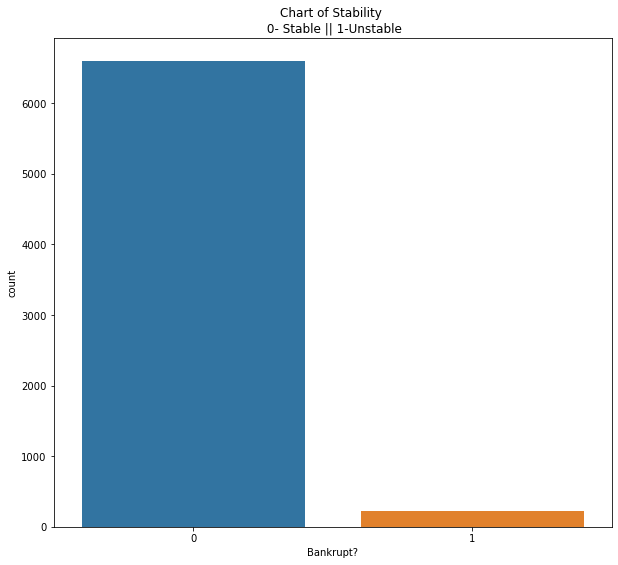

In [8]:
plt.figure(figsize=(10,9))
sns.countplot(data["Bankrupt?"])
plt.title("Chart of Stability \n 0- Stable || 1-Unstable")

This demonstrates just how skewed the data is

Creating a test and train set. Here, I was confused as to what should be used between StratifiedKFold and StratifiedShuffleSplit, so I tried both

In [9]:
X = data.copy()
y = data["Bankrupt?"]

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

In [11]:
skfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skfold.split(X,y):
    origin_trainX, origin_testX = X.iloc[train_index], X.iloc[test_index]
    origin_trainy, origin_testy = y.iloc[train_index], y.iloc[test_index]

#turning them into arrays
origin_trainX = origin_trainX.values
orrigin_testX = origin_testX.values
origin_trainy = origin_trainy.values
origin_testy = origin_testy.values

train_unique_label, train_counts_label = np.unique(origin_trainy, return_counts=True)
test_unique_label, test_counts_label = np.unique(origin_testy, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(origin_trainy))
print(test_counts_label/ len(origin_testy))

Label Distributions: 

[0.96774194 0.03225806]
[0.96771827 0.03228173]


Time to try StratifiedShuffleSplit

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

for train_index, test_index in split.split(data, data["Bankrupt?"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [13]:
strat_test_set["Bankrupt?"].value_counts() / len(strat_test_set)

0    0.967742
1    0.032258
Name: Bankrupt?, dtype: float64

In [14]:
strat_train_set["Bankrupt?"].value_counts() / len(strat_train_set)

0    0.967736
1    0.032264
Name: Bankrupt?, dtype: float64

In [15]:
data["Bankrupt?"].value_counts() / len(data)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
def bankrupcy_proportions(data):
    return data["Bankrupt?"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": bankrupcy_proportions(data),
    "Stratified": bankrupcy_proportions(strat_test_set),
    "Random": bankrupcy_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [17]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.967737,0.967742,0.96261,-0.529817,0.000489
1,0.032263,0.032258,0.03739,15.892095,-0.014663


# Exploration of data

Now we will pick a few columns that look interesting and see how they correlate with the label and each other

In [18]:
corr_matrix = data.corr()

corr_matrix["Bankrupt?"].sort_values(ascending=False)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

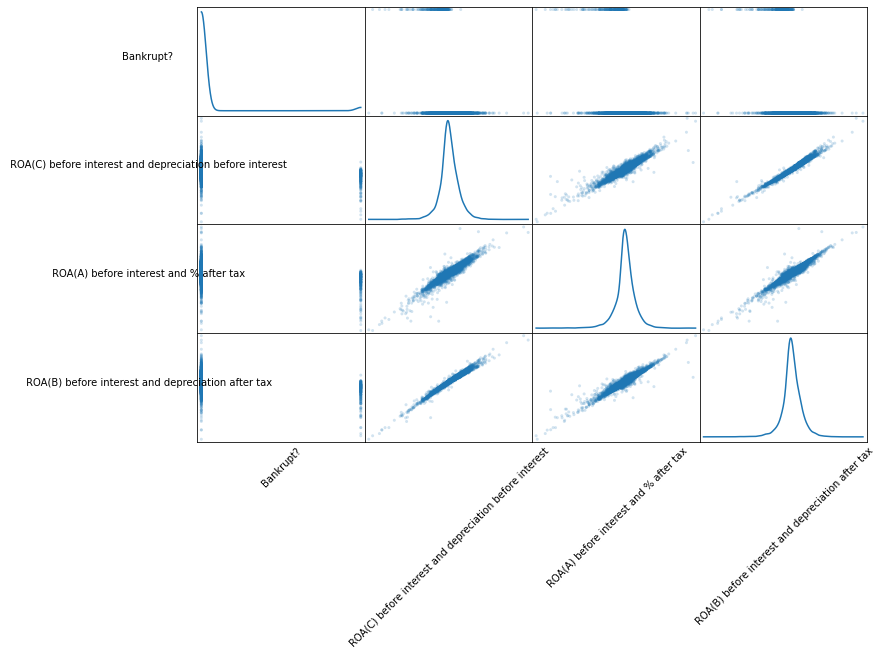

In [19]:
from pandas.plotting import scatter_matrix

# since there's shit ton of attributes, I'll divide into sets and see if we can make some interesting findings

# Set 1
attr1 = ['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',]
sc_attr1 = scatter_matrix(data[attr1], figsize=(12,8), alpha=0.2, diagonal="kde")

#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sc_attr1.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sc_attr1.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sc_attr1.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sc_attr1.reshape(-1)]
[s.set_yticks(()) for s in sc_attr1.reshape(-1)]

plt.show()

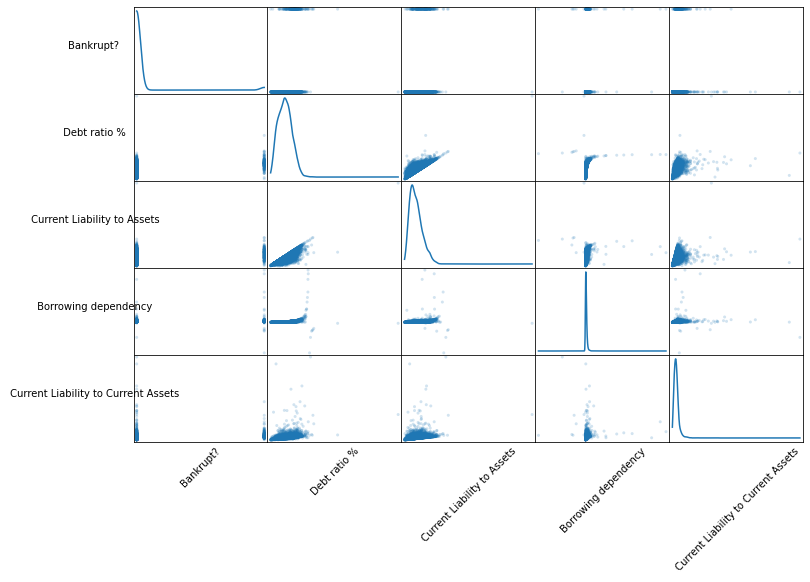

In [20]:
# Set 2
attr2 = ['Bankrupt?', ' Debt ratio %',
       ' Current Liability to Assets',
       ' Borrowing dependency', ' Current Liability to Current Assets']

sc_attr2 = scatter_matrix(data[attr2], figsize=(12,8), alpha=0.2, diagonal="kde")

#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sc_attr2.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sc_attr2.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sc_attr2.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sc_attr2.reshape(-1)]
[s.set_yticks(()) for s in sc_attr2.reshape(-1)]

plt.show()

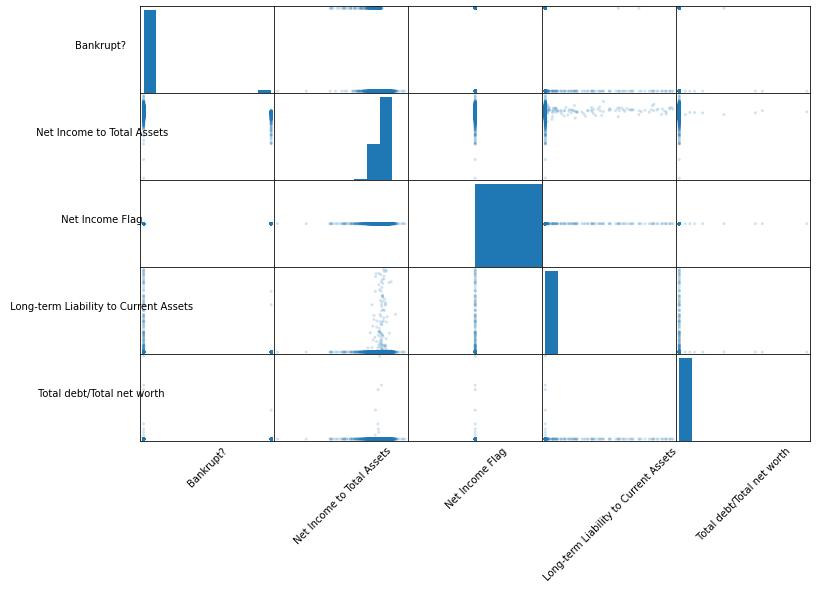

In [21]:
# Set 3
attr3 = ['Bankrupt?', ' Net Income to Total Assets',
         ' Net Income Flag', ' Long-term Liability to Current Assets',
         ' Total debt/Total net worth']

sc_attr3 = scatter_matrix(data[attr3], figsize=(12,8), alpha=0.2)

#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sc_attr3.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sc_attr3.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sc_attr3.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sc_attr3.reshape(-1)]
[s.set_yticks(()) for s in sc_attr3.reshape(-1)]

plt.show()

Oof, these are weird plottings, we can barely get any insight from them per se. However, it does seem like the correlation matrix does tell a story. Some attributes kinda affect the stability of a company. Also, I think the dataset being originally normalized made it harder for our plottings to derive a tangible relationship. But, I think we have enough to go on.

**Net Income Flag** presents itself as an interesting attribute as all of the data in that column is consistently 1. Hence, it is practically useless in training our model.
**Net Income to Total Asset** presents itself as a very important attribute in predicting if a company is unstable

[1.63387579e-02 1.17861125e-02 1.33309921e-02 1.07201694e-02
 1.07230887e-02 1.08965796e-02 1.07591159e-02 1.05709456e-02
 1.04896178e-02 1.06410385e-02 1.13039713e-02 1.10162157e-02
 1.06487913e-02 1.01777070e-02 9.29049210e-03 1.08194152e-02
 1.07889296e-02 1.09222691e-02 1.13161869e-02 1.07018818e-02
 1.03118800e-02 1.10782640e-02 1.15637463e-02 1.03172119e-02
 1.03136289e-02 1.02544861e-02 1.01958573e-02 1.02760875e-02
 1.15140499e-02 1.04060857e-02 1.08145220e-02 1.07173586e-02
 1.02598929e-02 1.07146496e-02 1.04380981e-02 1.05120051e-02
 1.09073428e-02 1.08286708e-02 1.03056850e-02 1.00652031e-02
 8.08262503e-03 1.12296284e-02 1.10605418e-02 1.07267316e-02
 1.05931611e-02 1.05586004e-02 1.08187042e-02 1.13701240e-02
 1.04662665e-02 1.05129041e-02 1.03822006e-02 1.06964982e-02
 1.04411020e-02 1.10651508e-02 1.09446131e-02 1.12952074e-02
 1.09972283e-02 1.03832841e-02 1.05291855e-02 1.06969056e-02
 1.06713170e-02 1.02159360e-02 1.03266108e-02 1.13712839e-02
 1.07040424e-02 1.055926

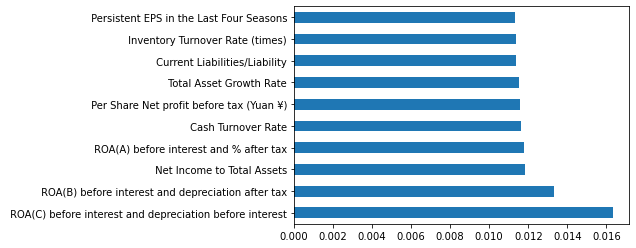

In [22]:
X = data.iloc[:,1:96]  #independent columns
y = data.iloc[:,1]    #target column i.e price range

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,encoded)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From the exploration of the features, we select top 9 features to train our model. This is done so we can avoid overfitting our model with noise, and speed up the time our algorithm takes

In [23]:
final_attrs = [' ROA(C) before interest and depreciation before interest',
               ' ROA(A) before interest and % after tax',
               ' ROA(B) before interest and depreciation after tax',
               ' Net Income to Total Assets',
               ' Current Liability to Liability',
               ' Cash Turnover Rate',
               ' Debt ratio %',
               ' Cash Turnover Rate',
               " Net Income to Stockholder's Equity"]

df = strat_train_set[final_attrs].copy()
df_label = strat_train_set["Bankrupt?"].copy()

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df, df_label)

LinearRegression()

In [25]:
some_data = df.iloc[:5]
some_labels = df_label.iloc[:5]

log_pred = lin_reg.predict(some_data)
print("Predictions:", log_pred)

Predictions: [-0.00053231  0.04338924 -0.01050275  0.06569767  0.02220525]


In [26]:
print("Labels:", list(some_labels))

Labels: [0, 0, 0, 0, 0]


Halfway in, I realized my mistake. I cannot use linear regression on a data that is more categorical than continuous. However, I did not want to erase it, so when I come back to this in the future, I can remember my mistake. Hence, I switched to Logistic Regression, and I also further split my training data  into more training and test set.

In [27]:
# Splitting the data into Train & Test sets

Xtrain,X_test,ytrain,y_test = train_test_split(df,df_label,
                                               test_size = 0.1,
                                               stratify = df_label,
                                               shuffle = True)
# Splitting the data into Train & valiation sets

X_train,X_val,y_train,y_val = train_test_split(Xtrain,ytrain,
                                               test_size = 0.1,
                                               stratify = ytrain,
                                               shuffle = True)

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_mod = log_reg.fit(X_train,y_train)
log_pred = log_mod.predict(X_val)

# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_val, log_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       475
           1       0.00      0.00      0.00        16

    accuracy                           0.97       491
   macro avg       0.48      0.50      0.49       491
weighted avg       0.94      0.97      0.95       491

